Marcos Lopes -- fevereiro de 2025

# Tokenização

**Texto a analisar**

In [47]:
# Notar o uso do apóstrofo
texto = "O rato roeu a roupa do Rei de Roma. Em seguida, jogou-se n'água do Mar Tirreno... Calcula-se que o prejuízo tenha sido alto: R$ 10.000,00."


**Manual**

In [48]:
tokens = texto.split()
print(tokens)


['O', 'rato', 'roeu', 'a', 'roupa', 'do', 'Rei', 'de', 'Roma.', 'Em', 'seguida,', 'jogou-se', "n'água", 'do', 'Mar', 'Tirreno...', 'Calcula-se', 'que', 'o', 'prejuízo', 'tenha', 'sido', 'alto:', 'R$', '10.000,00.']


**NLTK**

Vantagens:

*   O tokenizador considera especificidades linguísticas, como apóstrofos e hífens.
*   É possível tokenizar não só palavras, mas também sentenças.

In [49]:
# Importação do módulo e dos recursos necessários
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\knd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [39]:
# Tokenização de palavras e pontuação

word_tokenize(texto, language='portuguese')


['O',
 'rato',
 'roeu',
 'a',
 'roupa',
 'do',
 'Rei',
 'de',
 'Roma',
 '.',
 'Em',
 'seguida',
 ',',
 'jogou-se',
 "n'água",
 'do',
 'Mar',
 'Tirreno',
 '...',
 'Calcula-se',
 'que',
 'o',
 'prejuízo',
 'tenha',
 'sido',
 'alto',
 ':',
 'R',
 '$',
 '10.000,00',
 '.']

In [50]:
# Tokenização de sentenças

sent_tokenize(texto, language='portuguese')


['O rato roeu a roupa do Rei de Roma.',
 "Em seguida, jogou-se n'água do Mar Tirreno...",
 'Calcula-se que o prejuízo tenha sido alto: R$ 10.000,00.']

**spaCy**

Vantagem:

*   É o que mais bem funciona em geral.

Desvantagens:


*   Os modelos têm de estar pré-instalados;
*   O carregamento dos modelos na memória é lento;
*   Ocupa mais memória que o NLTK.


In [41]:
# Instalação/atualização do spaCy e dos modelos de língua
# !pip install -U spacy

# !python -m spacy download pt_core_news_sm  # Notar o "sm": Small Model


In [51]:
# Importação do módulo e do modelo de língua
import spacy
# !python -m spacy info  # P/ checar a versão (tem de ser >= 3.0)
nlp = spacy.load('pt_core_news_sm')


In [52]:
# Tokenização de palavras e pontuação

def tokenizar(sentenca: str) -> list:
    doc = nlp(sentenca)
    return [t.text for t in doc]  # Lista de atributos .text de cada token

tokens = tokenizar(texto)
print(tokens)


['O', 'rato', 'roeu', 'a', 'roupa', 'do', 'Rei', 'de', 'Roma', '.', 'Em', 'seguida', ',', 'jogou-se', "n'água", 'do', 'Mar', 'Tirreno', '...', 'Calcula-se', 'que', 'o', 'prejuízo', 'tenha', 'sido', 'alto', ':', 'R$', '10.000,00', '.']


In [53]:
# Tokenização de sentenças

def sents(sentencas: str) -> list:
    doc = nlp(sentencas)
    return doc.sents

for s in sents(texto):
    print(s)


O rato roeu a roupa do Rei de Roma.
Em seguida, jogou-se n'água do Mar Tirreno...
Calcula-se que o prejuízo tenha sido alto: R$ 10.000,00.


# Limpeza

In [ ]:
# Aqui vai uma função simples que normaliza a caixa dos caracteres (para minúsculas)
# e elimina os símbolos não-alfabéticos (pontuação, números...)

def limpar(lista_de_palavras: list) -> list:
    return [i.lower() for i in lista_de_palavras if i.isalpha()]


In [55]:
limpar(tokenizar(texto))


['o',
 'rato',
 'roeu',
 'a',
 'roupa',
 'do',
 'rei',
 'de',
 'roma',
 'em',
 'seguida',
 'do',
 'mar',
 'tirreno',
 'que',
 'o',
 'prejuízo',
 'tenha',
 'sido',
 'alto']

# Palavras vazias

**NLTK**

*   Uma lista pequena, mas rápida de se carregar.

In [56]:
nltk.download('stopwords')
stops_nltk = nltk.corpus.stopwords.words('portuguese')

len(stops_nltk)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\knd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


207

**spaCy**


*   Uma lista mais abrangente, mas mais lenta e com mais exigência de memória para carregar o modelo.
* Atenção! A "lista" do spaCy é, na verdade, um conjunto (set).




In [57]:
stops_spacy = nlp.Defaults.stop_words

len(stops_spacy)


416

**União das duas listas**

In [58]:
stops = set(stops_nltk) | stops_spacy

len(stops)


500

In [59]:
list(stops)[:15]


['dezanove',
 'segundo',
 'tivéramos',
 'tiveste',
 'logo',
 'hajam',
 'estivessem',
 'certeza',
 'em',
 'houverem',
 'quarta',
 'esses',
 'estávamos',
 'assim',
 'esteja']

In [96]:
def limpar_stopwords(lista_de_palavras: list) -> list:
    return [i for i in lista_de_palavras if i not in stops]


# Stemização
Exclusivamente no NLTK

In [60]:
# Carregamento do stemizador
nltk.download('rslp')
raiz = nltk.stem.RSLPStemmer().stem

print(raiz('nada'))
print(raiz('nadinha'))
print(raiz('nadabóbora'))


nad
nad
nadabób


[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\knd\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


# Lematização


*   Exclusivamente no spaCy
*   O resultado tem muitos erros, mas, quando se usa o modelo grande de língua, a performance melhora.



In [61]:
# Baixando o modelo de língua grande (lg) para o português
# !python -m spacy download pt_core_news_lg

nlp = spacy.load('pt_core_news_lg')
nlp.path


WindowsPath('c:/Users/knd/repos/study/POLI/NLP/.venv/Lib/site-packages/pt_core_news_lg/pt_core_news_lg-3.8.0')

In [62]:
def lema(sentenca: str) -> list:
    doc = nlp(sentenca)
    return [token.lemma_ for token in doc]

print(lema('Se estas palavras fossem lematizadas, ficariam muitíssimo diferentes.'))


['se', 'este', 'palavra', 'ser', 'lematizar', ',', 'ficar', 'muitíssimo', 'diferente', '.']


# Hápax Legômena

In [63]:
# Para criar uma lista de hápax legômena
def hapax(lista_de_palavras: list) -> list:
    return [i for i in lista_de_palavras if lista_de_palavras.count(i) == 1]

# Para eliminá-los da lista de tokens
def sem_hapax(lista_de_palavras):
    return [i for i in lista_de_palavras if lista_de_palavras.count(i) > 1]


In [64]:
verso = limpar(tokenizar('boi, boi, boi, boi da cara preta'))
print(verso)
print(hapax(verso))
print(sem_hapax(verso))


['boi', 'boi', 'boi', 'boi', 'da', 'cara', 'preta']
['da', 'cara', 'preta']
['boi', 'boi', 'boi', 'boi']


# Mãos à obra!
Vamos trabalhar com a leitura de um arquivo de texto bruto e aplicação do pipeline completo de pré-processamento dos dados e a contagem das unidades lexicais que vimos até agora. Usaremos o livro "O Guarani", de José de Alencar, que está disponível para download na plataforma AlunoWeb.

**Exercícios**

1. Abra o arquivo "Guarani.txt" e calcule:

*   O número total de caracteres
*   O número de caracteres sem espaços em branco
*   O número de palavras (dica: para um trabalho de boa qualidade, tokenize e limpe o texto)


2. Mostre as 20 palavras mais frequentes do texto em ordem descrescente de ocorrência.

* Dica: use a função Counter() da biblioteca `collections`.

3. Discuta o resultado. Qual a característica mais evidente dessas palavras frequentes?

4. Calcule:
*   O vocabulário do livro (o número de lemas)

5. Reduza os tokens a raízes.
* O conjunto das raízes é maior ou menor que o vocabulário (de lemas)?
* Discuta as vantagens e os riscos implicados no uso de um ou outro.


6. Crie uma lista dos hápax legômena e responda:
* Qual a proporção de hápax legômena no vocabulário?
* Exiba os 50 primeiros hápax legômena da sua lista. Baseando-se no que você vê, será que existem traços em comum entre eles?  Discuta se poderiam ser eliminados sem prejuízo para uma análise do conteúdo do texto.

7. Crie uma versão do livro "privilegiando o conteúdo": uma lista sem hápax legômena, sem palavras vazias e com as palavras restantes stemizadas.
* Compare o número de tokens desse "livro" com o primeiro cálculo de tokens, aquele sobre o texto original.


### 1

In [ ]:
with open('Guarani.txt', 'r', encoding='utf-8') as file:
    guarani_text_og = file.read()
guarani_text_og


'O Guarani, de José de Alencar\nFonte:\nALENCAR, José de. O guarani. 20a ed., São Paulo: Ática, 1996 (Bom Livro).\nTexto proveniente de:\nA Biblioteca Virtual do Estudante Brasileiro <http://www.bibvirt.futuro.usp.br>\nA Escola do Futuro da Universidade de São Paulo\nPermitido o uso apenas para fins educacionais.\nEste material pode ser redistribuído livremente, desde que não seja alterado, e que as informações acima sejam\nmantidas. Para maiores informações, escreva para <bibvirt@futuro.usp.br>.\nEstamos em busca de patrocinadores e voluntários para nos ajudar a manter este projeto. Se você quer ajudar de\nalguma forma, mande um e-mail para <bibvirt@futuro.usp.br> e saiba como isso é possível.\n                                                 O Guarani\n                                                  José de Alencar\n                                                   PRÓLOGO\nMinha prima. — Gostou da minha história, e pede-me um romance; acha que posso fazer\nalguma coisa neste ramo

In [ ]:
guarani_text_og[29]


'\n'

In [86]:
import re
guarani_text = guarani_text_og.replace('\n', ' ')
guarani_text = re.sub(' +', ' ', guarani_text)
guarani_text


'O Guarani, de José de Alencar Fonte: ALENCAR, José de. O guarani. 20a ed., São Paulo: Ática, 1996 (Bom Livro). Texto proveniente de: A Biblioteca Virtual do Estudante Brasileiro <http://www.bibvirt.futuro.usp.br> A Escola do Futuro da Universidade de São Paulo Permitido o uso apenas para fins educacionais. Este material pode ser redistribuído livremente, desde que não seja alterado, e que as informações acima sejam mantidas. Para maiores informações, escreva para <bibvirt@futuro.usp.br>. Estamos em busca de patrocinadores e voluntários para nos ajudar a manter este projeto. Se você quer ajudar de alguma forma, mande um e-mail para <bibvirt@futuro.usp.br> e saiba como isso é possível. O Guarani José de Alencar PRÓLOGO Minha prima. — Gostou da minha história, e pede-me um romance; acha que posso fazer alguma coisa neste ramo de literatura. Engana-se; quando se conta aquilo que nos impressionou profundamente, o coração é que fala; quando se exprime aquilo que outros sentiram ou podem sen

In [88]:
print("Total de letras original:",len(guarani_text_og))
print("Total de letras sem tabs e puladas de linhas:",len(guarani_text))


Total de letras original: 626296
Total de letras sem tabs e puladas de linhas: 622216


In [91]:

tokens_spacy = tokenizar(guarani_text)
tokens_spacy


['O',
 'Guarani',
 ',',
 'de',
 'José',
 'de',
 'Alencar',
 'Fonte',
 ':',
 'ALENCAR',
 ',',
 'José',
 'de',
 '.',
 'O',
 'guarani',
 '.',
 '20a',
 'ed.',
 ',',
 'São',
 'Paulo',
 ':',
 'Ática',
 ',',
 '1996',
 '(',
 'Bom',
 'Livro',
 ')',
 '.',
 'Texto',
 'proveniente',
 'de',
 ':',
 'A',
 'Biblioteca',
 'Virtual',
 'do',
 'Estudante',
 'Brasileiro',
 '<',
 'http://www.bibvirt.futuro.usp.br',
 '>',
 'A',
 'Escola',
 'do',
 'Futuro',
 'da',
 'Universidade',
 'de',
 'São',
 'Paulo',
 'Permitido',
 'o',
 'uso',
 'apenas',
 'para',
 'fins',
 'educacionais',
 '.',
 'Este',
 'material',
 'pode',
 'ser',
 'redistribuído',
 'livremente',
 ',',
 'desde',
 'que',
 'não',
 'seja',
 'alterado',
 ',',
 'e',
 'que',
 'as',
 'informações',
 'acima',
 'sejam',
 'mantidas',
 '.',
 'Para',
 'maiores',
 'informações',
 ',',
 'escreva',
 'para',
 '<',
 'bibvirt@futuro.usp.br',
 '>',
 '.',
 'Estamos',
 'em',
 'busca',
 'de',
 'patrocinadores',
 'e',
 'voluntários',
 'para',
 'nos',
 'ajudar',
 'a',
 'mant

In [90]:
tokens_nltk = word_tokenize(guarani_text)
tokens_nltk


['O',
 'Guarani',
 ',',
 'de',
 'José',
 'de',
 'Alencar',
 'Fonte',
 ':',
 'ALENCAR',
 ',',
 'José',
 'de',
 '.',
 'O',
 'guarani',
 '.',
 '20a',
 'ed.',
 ',',
 'São',
 'Paulo',
 ':',
 'Ática',
 ',',
 '1996',
 '(',
 'Bom',
 'Livro',
 ')',
 '.',
 'Texto',
 'proveniente',
 'de',
 ':',
 'A',
 'Biblioteca',
 'Virtual',
 'do',
 'Estudante',
 'Brasileiro',
 '<',
 'http',
 ':',
 '//www.bibvirt.futuro.usp.br',
 '>',
 'A',
 'Escola',
 'do',
 'Futuro',
 'da',
 'Universidade',
 'de',
 'São',
 'Paulo',
 'Permitido',
 'o',
 'uso',
 'apenas',
 'para',
 'fins',
 'educacionais',
 '.',
 'Este',
 'material',
 'pode',
 'ser',
 'redistribuído',
 'livremente',
 ',',
 'desde',
 'que',
 'não',
 'seja',
 'alterado',
 ',',
 'e',
 'que',
 'as',
 'informações',
 'acima',
 'sejam',
 'mantidas',
 '.',
 'Para',
 'maiores',
 'informações',
 ',',
 'escreva',
 'para',
 '<',
 'bibvirt',
 '@',
 'futuro.usp.br',
 '>',
 '.',
 'Estamos',
 'em',
 'busca',
 'de',
 'patrocinadores',
 'e',
 'voluntários',
 'para',
 'nos',
 'a

In [ ]:
tokens_limpos_spacy = limpar(tokens_spacy)
tokens_limpos_nltk = limpar(tokens_nltk)
tokens_limpos_spacy[300],tokens_limpos_nltk[300]


('horas', 'aqui')

In [95]:
print('Quantidade de Tokens spacy,nltk')
len(tokens_limpos_spacy),len(tokens_limpos_nltk)


Quantidade de Tokens spacy,nltk


(103688, 103703)

In [102]:
tokens_sw_spacy = limpar_stopwords(tokens_limpos_spacy)
tokens_sw_nltk = limpar_stopwords(tokens_limpos_nltk)
print('Quantidade de Tokens sem stopwords spacy,nltk')
len(tokens_sw_spacy),len(tokens_sw_nltk)


Quantidade de Tokens sem stopwords spacy,nltk


(47146, 47163)

### 2

In [116]:
from collections import Counter

c_spacy = Counter(tokens_limpos_spacy)
c_nltk = Counter(tokens_limpos_nltk)

i = 1
for spacy,nltk in zip(c_spacy.most_common(20),c_nltk.most_common(20)):
    print(f"Spacy Top {i}: {spacy} | Nltk Top {i}: {nltk}")


Spacy Top 1: ('a', 4392) | Nltk Top 1: ('a', 4392)
Spacy Top 1: ('que', 4283) | Nltk Top 1: ('que', 4283)
Spacy Top 1: ('o', 3899) | Nltk Top 1: ('o', 3899)
Spacy Top 1: ('de', 3867) | Nltk Top 1: ('de', 3867)
Spacy Top 1: ('e', 3587) | Nltk Top 1: ('e', 3587)
Spacy Top 1: ('um', 1653) | Nltk Top 1: ('um', 1653)
Spacy Top 1: ('do', 1367) | Nltk Top 1: ('do', 1367)
Spacy Top 1: ('não', 1276) | Nltk Top 1: ('não', 1276)
Spacy Top 1: ('uma', 1183) | Nltk Top 1: ('uma', 1183)
Spacy Top 1: ('se', 1090) | Nltk Top 1: ('se', 1090)
Spacy Top 1: ('da', 1087) | Nltk Top 1: ('da', 1087)
Spacy Top 1: ('os', 1045) | Nltk Top 1: ('os', 1045)
Spacy Top 1: ('com', 1011) | Nltk Top 1: ('com', 1011)
Spacy Top 1: ('sua', 917) | Nltk Top 1: ('sua', 917)
Spacy Top 1: ('para', 849) | Nltk Top 1: ('para', 849)
Spacy Top 1: ('seu', 771) | Nltk Top 1: ('seu', 771)
Spacy Top 1: ('peri', 728) | Nltk Top 1: ('peri', 728)
Spacy Top 1: ('em', 698) | Nltk Top 1: ('em', 698)
Spacy Top 1: ('as', 697) | Nltk Top 1: ('a

In [ ]:

c_spacy = Counter(tokens_sw_spacy)
c_nltk = Counter(tokens_sw_nltk)

i = 1
for spacy,nltk in zip(c_spacy.most_common(20),c_nltk.most_common(20)):
    print(f"Spacy Top {i}: {spacy} | Nltk Top {i}: {nltk}")


Spacy Top 1: ('peri', 728) | Nltk Top 1: ('peri', 728)
Spacy Top 2: ('cecília', 458) | Nltk Top 2: ('cecília', 458)
Spacy Top 3: ('índio', 338) | Nltk Top 3: ('índio', 338)
Spacy Top 4: ('antônio', 300) | Nltk Top 4: ('antônio', 300)
Spacy Top 5: ('álvaro', 279) | Nltk Top 5: ('álvaro', 279)
Spacy Top 6: ('disse', 244) | Nltk Top 6: ('disse', 244)
Spacy Top 7: ('olhos', 227) | Nltk Top 7: ('olhos', 227)
Spacy Top 8: ('senhora', 227) | Nltk Top 8: ('senhora', 227)
Spacy Top 9: ('menina', 215) | Nltk Top 9: ('menina', 215)
Spacy Top 10: ('isabel', 196) | Nltk Top 10: ('isabel', 196)
Spacy Top 11: ('havia', 195) | Nltk Top 11: ('havia', 195)
Spacy Top 12: ('fidalgo', 193) | Nltk Top 12: ('fidalgo', 193)
Spacy Top 13: ('casa', 190) | Nltk Top 13: ('casa', 190)
Spacy Top 14: ('mariz', 175) | Nltk Top 14: ('mariz', 175)
Spacy Top 15: ('loredano', 174) | Nltk Top 15: ('loredano', 174)
Spacy Top 16: ('italiano', 173) | Nltk Top 16: ('italiano', 173)
Spacy Top 17: ('aventureiros', 172) | Nltk T

### 3
Ao fazer o Ranking das maiores palavras antes de tirar as stopwords, podemos ver que as mesmas dominam em quantidade, talvez esse seja um dos maiores motivos que as removemos, elas geram uma poluição sem agregar valor nenhum.

Ao remover as stopwords, podemos ver que as palavras que mais aparecem estao muito mais relacionadas a historia, entao sao nomes que aparecem varias vezes, ou palavras que sao pertinentes mas repetidas varias vezes.

### 4

In [120]:
lema_sp = lema((" ").join(tokens_sw_spacy))
lema_nltk = lema((" ").join(tokens_sw_nltk))
lema_sp


['guarani',
 'José',
 'Alencar',
 'fonte',
 'alencar',
 'José',
 'guarani',
 'Paulo',
 'ático',
 'livro',
 'texto',
 'proveniente',
 'biblioteca',
 'virtual',
 'estudante',
 'brasileiro',
 'escola',
 'futuro',
 'universidade',
 'Paulo',
 'permitir',
 'uso',
 'fim',
 'educacional',
 'material',
 'redistribuir',
 'livremente',
 'alterar',
 'informação',
 'acima',
 'mantir',
 'grande',
 'informação',
 'escrevir',
 'buscar',
 'patrocinador',
 'voluntário',
 'ajudar',
 'manter',
 'projeto',
 'ajudar',
 'algum',
 'mande',
 'saiba',
 'guarani',
 'José',
 'alencar',
 'prólogo',
 'prima',
 'gostar',
 'história',
 'romance',
 'achar',
 'algum',
 'ramo',
 'literatura',
 'contar',
 'impressionar',
 'profundamente',
 'coração',
 'falar',
 'exprimir',
 'sentiram',
 'sentir',
 'falar',
 'memória',
 'imaginação',
 'errar',
 'coração',
 'verdadeiro',
 'senão',
 'sentir',
 'sentimento',
 'beleza',
 'julgar',
 'habilitar',
 'escrever',
 'romance',
 'apesar',
 'fazer',
 'vida',
 'entretanto',
 'aproveitar

In [121]:
len(lema_sp),len(lema_nltk)


(47146, 47163)

# Bônus: Geração de nuvens de palavras

In [ ]:
texto_minusc = texto.lower()


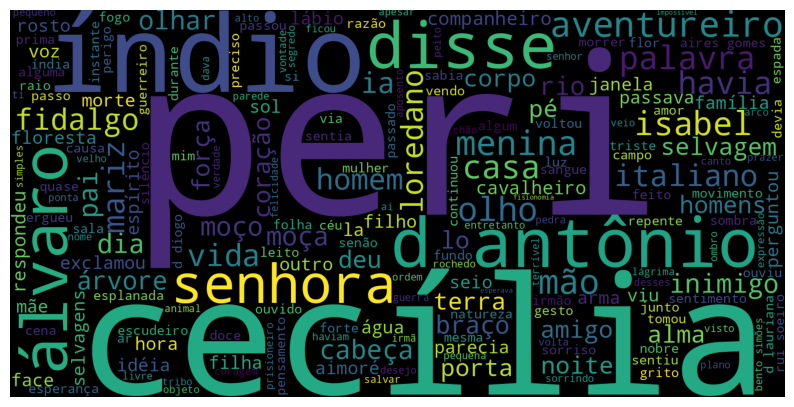

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nuvem = WordCloud(stopwords=stops,
                    background_color='black',
                    width=1600, height=800).generate(texto_minusc)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(nuvem, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(nuvem);
